In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
 # Load .env enviroment variables
load_dotenv('key.env')

True

In [3]:
my_btc = 2.4
my_eth = 5.9

In [4]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [20]:
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()

# Fetch current BTC price
my_btc_value = response_data['data']['1']['quotes']['USD']['price']

eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()

# Fetch current ETH price 
my_eth_value = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
eth_value = my_eth * my_eth_value
btc_value = my_btc * my_btc_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")



The current value of your 2.4 BTC is $45943.37
The current value of your 5.9 ETH is $7622.27


In [6]:
 # Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [15]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-10', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame

#SPY = df['close']

SPY = df_investments[df_investments['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_investments[df_investments['symbol'] == 'AGG'].drop('symbol', axis = 1)
df_investments = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

df_investments

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2020-05-11 04:00:00+00:00  290.37  294.0000  289.8800  292.50   79515876   
2020-05-12 04:00:00+00:00  293.75  294.2400  286.5200  286.67   95999786   
2020-05-13 04:00:00+00:00  285.95  287.1900  278.9650  281.60  144809899   
2020-05-14 04:00:00+00:00  278.84  285.1100  272.9900  284.97  121978055   
2020-05-15 04:00:00+00:00  282.32  286.3300  281.3400  286.28  111232676   
...                           ...       ...       ...     ...        ...   
2022-10-13 04:00:00+00:00  349.43  367.5100  348.1100  365.97  145171940   
2022-10-14 04:00:00+00:00  368.54  370.2600  356.9600  357.63  122920585   
2022-10-17 04:00:00+00:00  363.99  367.9799  357.2808  366.82   92765345   
2022-10-18 04:00:00+00:00  375.07  375.4500  367.5200  371.13   96898206   
2022-10-19 04:00:00+00:00  368.98  371.8500  365.5500  368.50   79481512   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-11 04:00:00+00:00      419260  292.278175  116.40  116.4300  116.0650   
2020-05-12 04:00:00+00:00      473668  290.175286  116.46  116.5950  116.2300   
2020-05-13 04:00:00+00:00      833463  282.592780  116.63  116.7600  116.4500   
2020-05-14 04:00:00+00:00      751985  281.007718  116.91  116.9700  116.7200   
2020-05-15 04:00:00+00:00      541431  284.426420  117.00  117.0900  116.9000   
...                               ...         ...     ...       ...       ...   
2022-10-13 04:00:00+00:00     1098996  359.798331   94.23   95.4400   94.1800   
2022-10-14 04:00:00+00:00      818595  361.365272   95.63   95.6300   94.6100   
2022-10-17 04:00:00+00:00      609955  365.954505   95.28   95.4000   94.8300   
2022-10-18 04:00:00+00:00      675916  371.126991   95.11   95.1800   94.6400   
2022-10-19 04:00:00+00:00      531675  368.665769   94.41   94.5584   94.1528   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-05-11 04:00:00+00:00  116.11  5249607       16091  116.156165  
2020-05-12 04:00:00+00:00  116.41  6161470       21099  116.418538  
2020-05-13 04:00:00+00:00  116.60  4425927       16375  116.647726  
2020-05-14 04:00:00+00:00  116.96  5698908       20153  116.866224  
2020-05-15 04:00:00+00:00  117.03  5897983       19220  116.995900  
...                           ...      ...         ...         ...  
2022-10-13 04:00:00+00:00   95.18  6231878       23778   95.068272  
2022-10-14 04:00:00+00:00   94.66  8567937       22665   94.776094  
2022-10-17 04:00:00+00:00   94.86  5455448       20840   95.037152  
2022-10-18 04:00:00+00:00   95.02  6108720       21495   94.955551  
2022-10-19 04:00:00+00:00   94.20  6295299       18782   94.314399  

[617 rows x 14 columns]

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][-1])
spy_close_price = float(df_investments["SPY"]["close"][-1])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.2
Current SPY closing price: $368.5


In [19]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18425.00
The current value of your 200 AGG shares is $18840.00


In [22]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
crypto = btc_value + eth_value
shares = my_spy_value + my_agg_value

amount = [crypto, shares]

index = ["crypto", "shares"]
# Create savings DataFrame
df_savings = pd.DataFrame(amount, index=index, columns = ['amount'])

# Display savings DataFrame
display(df_savings)


,amount
crypto,53565.637
shares,37265.000


<AxesSubplot:title={'center':'Pie Chart for Savings'}, ylabel='amount'>

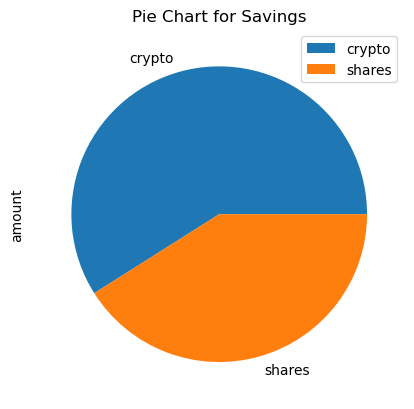

In [23]:
# Plot savings pie chart
 .plot.pie(y="amount", title="Pie Chart for Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health

if total_savings > emergency_fund:
    print("You have enough money!")
    
elif total_savings == emergency_fund:
    print("Congrats on reaching your financial goal")
    
else:
    print(f"{emergency_fund - total_savings} you are this far away from you goals")

You have enough money!


In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG


# Reorganize the DataFrame

# Separate ticker data
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date, end = end_date
).df



SPY = df_investments[df_investments['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_investments[df_investments['symbol'] == 'AGG'].drop('symbol', axis = 1)

df_stock_data = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500 

MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [30]:
# Printing the simulation input data
MC_Daily.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jasonomarsarie/Desktop/unit5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998284,0.999639,1.000625,1.004837,1.005581,1.008220,0.997273,1.003699,1.000618,0.996370,...,1.007073,1.006038,1.002171,0.998503,1.004108,1.000526,1.002280,0.999562,0.994797,0.994803
2,0.995800,1.003303,0.996663,1.002189,1.008166,0.996928,0.982726,0.993054,1.011027,1.000294,...,1.007674,1.005137,1.004638,0.990333,0.996372,0.999148,0.999350,0.997580,0.995944,1.000043
3,1.001079,0.999052,1.006803,1.008698,1.003134,1.001755,0.975421,0.998109,1.007254,1.012989,...,1.018452,1.003741,1.003940,0.994011,0.990700,0.993803,1.001692,0.992464,0.995487,1.002357
4,1.004005,0.997758,1.006584,1.001804,1.001981,0.999732,0.974785,1.002193,1.005993,1.012532,...,1.023125,1.003602,1.007213,0.979262,0.997404,0.990250,0.997798,1.000146,0.996130,1.011167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.798816,5.931999,6.608192,6.185887,4.773060,6.720280,7.988426,3.536727,7.545513,16.282416,...,5.776009,9.347082,14.457011,4.363443,3.252699,5.806487,7.992056,7.778146,11.852275,7.716264
7557,6.795067,5.929854,6.558992,6.177438,4.804194,6.761694,7.888736,3.541065,7.542816,16.194396,...,5.791595,9.383789,14.387057,4.357868,3.266473,5.802216,8.039535,7.762832,11.735136,7.668128
7558,6.795191,5.908814,6.611933,6.216868,4.815135,6.749176,7.867729,3.528078,7.533473,16.148949,...,5.849887,9.343801,14.404565,4.345638,3.249473,5.785278,8.057984,7.674046,11.655348,7.689475
7559,6.796042,5.897023,6.636945,6.222515,4.807146,6.786195,7.837444,3.532510,7.485988,16.215705,...,5.828175,9.353562,14.453260,4.335013,3.281703,5.828214,7.992593,7.597911,11.597139,7.659569


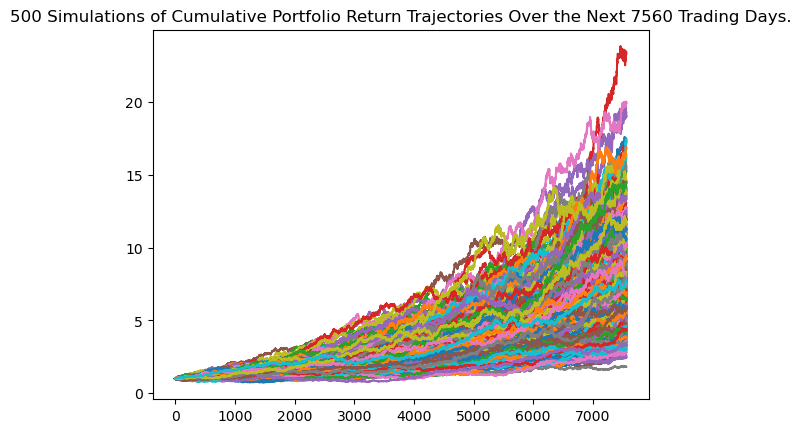

In [33]:
# Plot simulation outcomes
line_graph_plot = MC_Daily.plot_simulation()

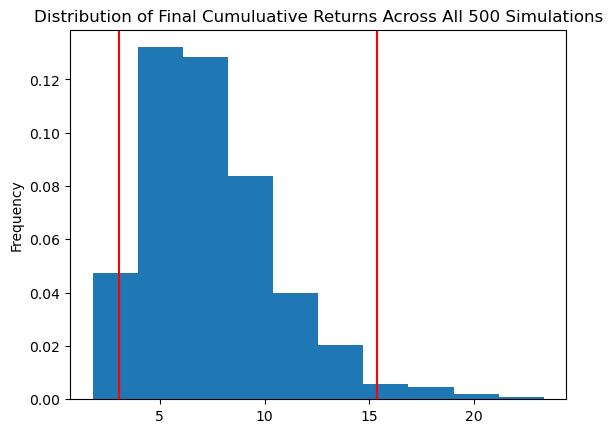

In [34]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_Daily.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              7.478161
std               3.203925
min               1.810164
25%               5.174142
50%               6.886144
75%               9.040825
max              23.319994
95% CI Lower      3.043626
95% CI Upper     15.346578
Name: 7560, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60872.51 and $306931.57


In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91308.77 and $460397.35
